# Sales Performance Analysis

## Objectives:
1. Identify top-performing branches based on total sales revenue.
2. Analyze sales trends over time (daily, weekly, monthly).
3. Investigate the impact of customer type (Member vs. Non-Member) on sales.

## Step 1: Load and Explore the Dataset

### 1.1 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Load the Dataset

In [3]:
df = pd.read_csv("/Users/juanflores/PycharmProjects/SupermarketSales/supermarket_sales.csv")

### 1.3 Inspect the Data

In [5]:
df.head()  # View first few rows

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
df.info()  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [16]:
df.describe()  # Get statistical summary

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


### 1.4 Check for Missing Values

In [17]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Step 2: Identify Top-Performing Branches

### 2.1 Calculate Total Sales per Branch

In [20]:
branch_sales = df.groupby("Branch")["Total"].sum().reset_index()
branch_sales = branch_sales.sort_values(by="Total", ascending=False)
branch_sales

,Branch,Total
2,C,110568.7065
0,A,106200.3705
1,B,106197.6720


### 2.2 Visualize Sales per Branch

/var/folders/dc/hbpq0rls7ynf916_tq2cc5lr0000gn/T/ipykernel_94035/2697274160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Branch", y="Total", data=branch_sales, palette="viridis")


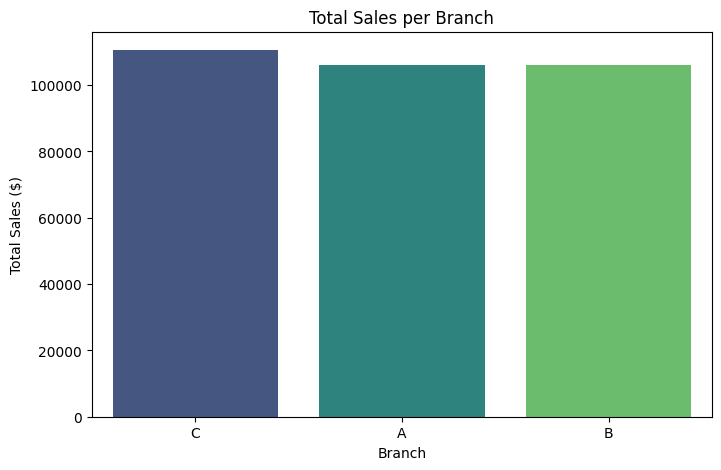

In [21]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Branch", y="Total", data=branch_sales, palette="viridis")
plt.title("Total Sales per Branch")
plt.xlabel("Branch")
plt.ylabel("Total Sales ($)")
plt.show()

## Step 3: Analyze Sales Trends Over Time

### 3.1 Convert Date Column to Datetime Format

In [22]:
df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.day
df["Week"] = df["Date"].dt.isocalendar().week
df["Month"] = df["Date"].dt.month

### 3.2 Daily Sales Trend

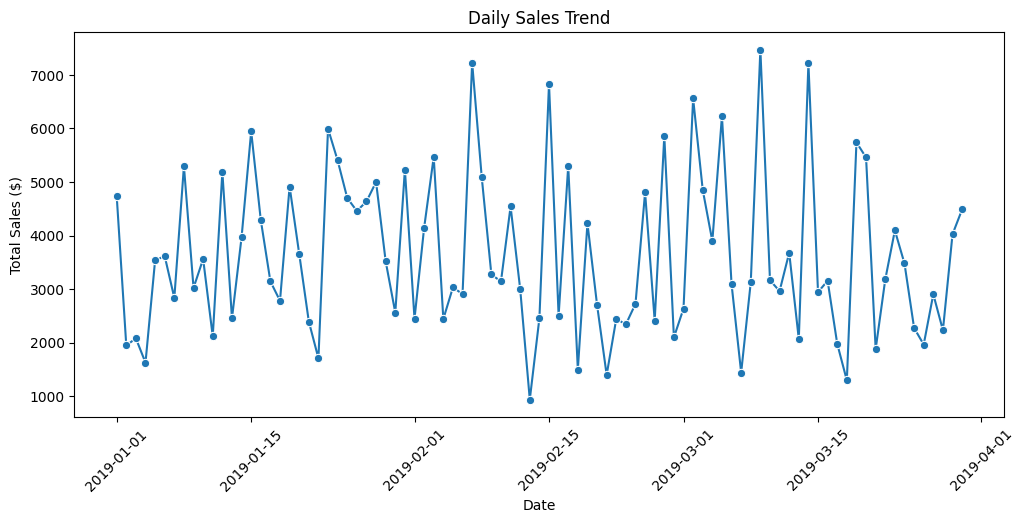

In [23]:
daily_sales = df.groupby("Date")["Total"].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x="Date", y="Total", data=daily_sales, marker="o")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

### 3.3 Weekly Sales Trend

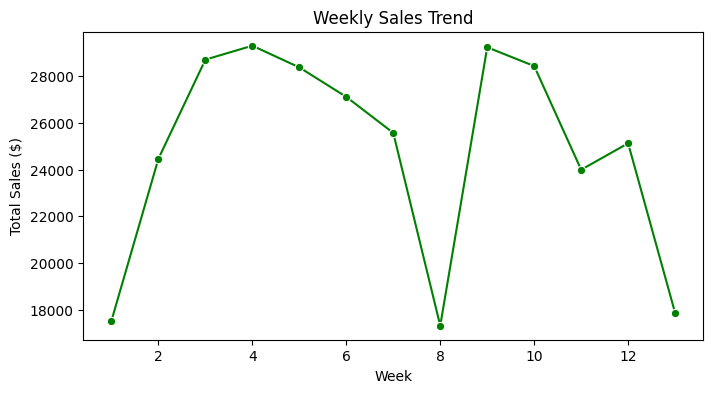

In [24]:
weekly_sales = df.groupby("Week")["Total"].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(x="Week", y="Total", data=weekly_sales, marker="o", color="green")
plt.title("Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Sales ($)")
plt.show()

### 3.4 Monthly Sales Comparison

/var/folders/dc/hbpq0rls7ynf916_tq2cc5lr0000gn/T/ipykernel_94035/2114268862.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Month", y="Total", data=monthly_sales, palette="Blues")


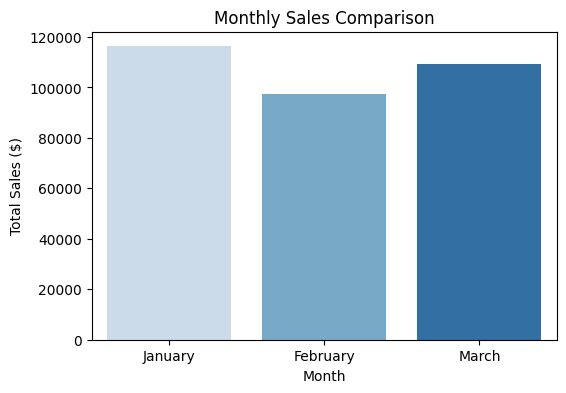

In [27]:
monthly_sales = df.groupby("Month")["Total"].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x="Month", y="Total", data=monthly_sales, palette="Blues")
plt.title("Monthly Sales Comparison")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks([0, 1, 2], ["January", "February", "March"])  # Customize labels
plt.show()

## Step 4: Analyze the Impact of Customer Type on Sales

### 4.1 Total Sales by Customer Type

/var/folders/dc/hbpq0rls7ynf916_tq2cc5lr0000gn/T/ipykernel_94035/2117077998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Customer type", y="Total", data=customer_sales, palette="coolwarm")


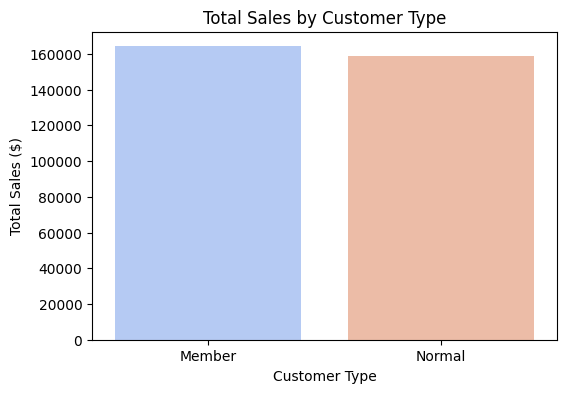

In [28]:
customer_sales = df.groupby("Customer type")["Total"].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x="Customer type", y="Total", data=customer_sales, palette="coolwarm")
plt.title("Total Sales by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales ($)")
plt.show()

### 4.2 Average Purchase Amount per Customer Type

/var/folders/dc/hbpq0rls7ynf916_tq2cc5lr0000gn/T/ipykernel_94035/2108039196.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Customer type", y="Total", data=customer_avg, palette="Set2")


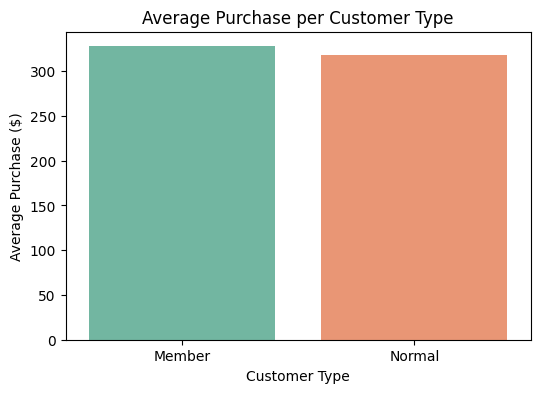

In [29]:
customer_avg = df.groupby("Customer type")["Total"].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x="Customer type", y="Total", data=customer_avg, palette="Set2")
plt.title("Average Purchase per Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Average Purchase ($)")
plt.show()

### 4.3 Percentage Contribution of Customer Types

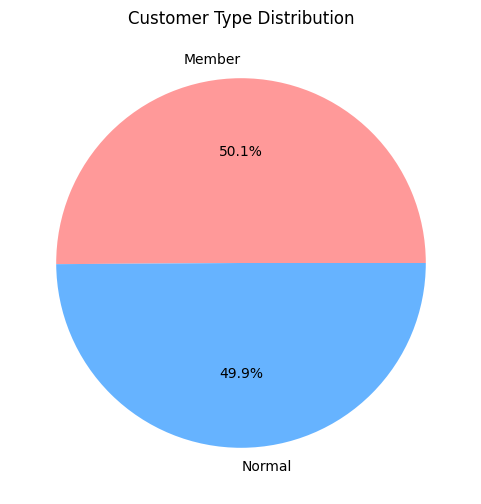

In [30]:
plt.figure(figsize=(6, 6))
df["Customer type"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#ff9999","#66b3ff"])
plt.title("Customer Type Distribution")
plt.ylabel("")
plt.show()